### Lineare Regressionsmodelle
In dieser Übung versuchen wir den Verkaufspreis von Autos mittles verschiedener Regressionsmodelle vorherzusagen. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [3]:
df = pd.read_csv("./CarPrice_Assignment.csv", index_col="car_ID")

## 1a. Vorbereitung der Daten
Im ersten Teil beschäftigen wir uns mit der Vorbereitung der Daten. Das Datenset hat viele Features, in dieser Übung benutzen wir allerdings nur ein paar davon.

Zuerst erstellen wir einen neuen `DataFrame` mit den Features `curbweight, enginesize, highwaympg, horsepower, citympg, peakrpm` und `price`.

In [4]:
data = df[['curbweight', 'enginesize', 'highwaympg', 'horsepower', 'citympg', 'peakrpm', 'price']]

- Benutze `pandas.plotting.scatter_matrix` um einen tieferen Einblick in die Daten zu bekommen. Gibt es Features, welche nützlicher sind als andere?
- Berechne eine Korrelationsmatrix. Benutze dafür `DataFrame.corr()`.

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


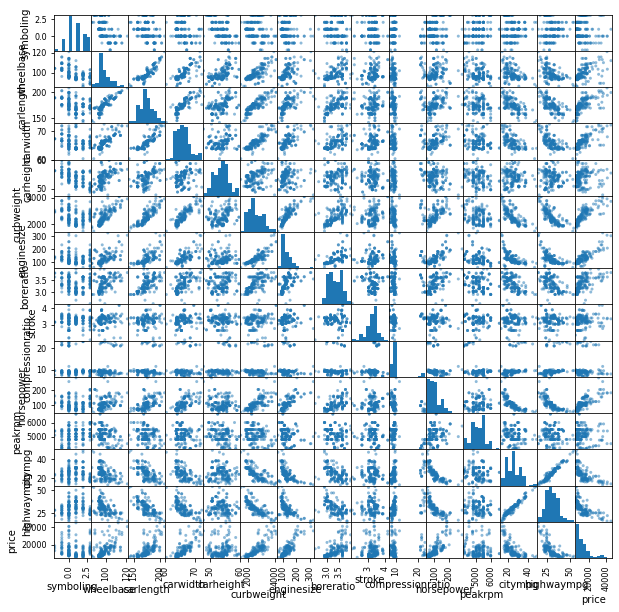

In [5]:
from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(df,figsize=(10,10))
df.corr()

In [6]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Zuletzt wollen wir unser Datenset in ein *Feature*-Datenset und ein *Target* Datenset teilen, um anschließend ein Trainings- und ein Testset zu erstellen. Diese können wir diese beiden Sets verwenden um einige Regressionsmodelle zu testen: 

In [12]:
from sklearn.model_selection import train_test_split
X = data[['curbweight', 'enginesize', 'highwaympg', 'horsepower', 'citympg', 'peakrpm']]
y = data.price
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

## 1b. Lineare Regression
- Benutze `X_train, y_train` und `sklearn.linear_model.LinearRegression` um eine lineare Regression zu trainieren.
- Validiere das Modell mit `sklearn.model_selection.cross_val_score`. Solltest du das Trainingsset oder das Testset verwenden?
- Benutze `numpy.mean` um den durchschnittlichen Score zu berechnen.
- Wie hoch ist der Score auf dem Test Set?

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy

linear_model = LinearRegression()
numpy.mean(cross_val_score(linear_model,X_train,y_train,cv=5))  # Ersetze `...` mit dem richtigen Code.

0.7879209677950414

In [18]:
#help(cross_val_score)

In [16]:
linear_model.fit(X_train,y_train )  # Ersetze `...` mit dem richtigen Code.
linear_model.score(X_test,y_test)  # Ersetze `...` mit dem richtigen Code.

0.8054887747405245

## 1c. Polynomregression
Kreiere eine `Pipeline` und benutze `PolynomialFeatures` um ein Polynomregressions-Modell zu erstellen.
Berechne den durchschnittlichen Cross Validation Score.
- was machen die Hyperparameter `interaction_only`, `include_bias` und `fit_intercept`?

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy

poly_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=..., interaction_only=...)),
    ("lin_reg",  LinearRegression())
])

Wir können eine Cross Validation mittles `GridSearchCV` machen. Um die inneren Parameter der `Pipeline` zu variieren können wir einen doppelten Unterstrich verwenden: `poly_features__degree`.

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(poly_reg, {"poly_features__degree": [...]}, return_train_score=True)
grid_search.fit(...)
print(f"Best params {grid_search.best_params_}")
print(f"Best score {grid_search.best_score_:.2f}")

Wir können die Ergebnisse der Cross Validation in einem DataFrame zusammenfassen:

In [ ]:
cv_results_df = pd.DataFrame(grid_search.cv_results_).sort_values("rank_test_score").reset_index(drop=True)
cv_results_df.head()

In [ ]:
cv_results_df[["mean_fit_time", "mean_score_time", "params", "mean_train_score", "std_train_score", "mean_test_score", "std_test_score"]]

Die folgende Hilfsfunktion kann verwendet werden um das Ergebnis in einen `DataFrame` umzuwandeln:

In [ ]:
def cv_results_df(cv_results):
    cv_results_df = pd.DataFrame(grid_search.cv_results_).sort_values("rank_test_score").reset_index(drop=True)
    cols = ["mean_fit_time", "mean_score_time", "params", "mean_train_score", "std_train_score", "mean_test_score", "std_test_score"]
    cols = [col for col in cols if col in cv_results_df.columns]
    return cv_results_df[cols]

cv_results_df(grid_search.cv_results_)

## 1d. Ridge Regression
- Erstelle eine `Pipeline` und benutze `PolynomialFeatures` um ein Polynomregressions-Modell zu erstellen. Benutze diesmal eine `Ridge` Regression. 
- Benutze `GridSearchCV` um den Hyperparameter $\alpha$ zu bestimmen.
- Berechne den durchschnittlichen Cross Validation Score mit dem besten $\alpha$-Wert. 
- Regularisierte Modelle funktionieren oft besser, wenn man die Daten zusätzlich skaliert. Benutze `StandardScaler` und vergleiche den Cross Validation Score. 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge


ridge_model = Pipeline([
    ("poly_features", PolynomialFeatures()),
    ("std_scaler", StandardScaler()),
    ("ridge_reg", Ridge())
])

grid_search = GridSearchCV(ridge_model, {
    "poly_features__degree": [...],
    "ridge_reg__alpha": [...]
})
grid_search.fit(...)
print(f"Best score {grid_search.best_score_:.2f}")

## 1e. Elastic Net
Benutze `PolynomialFeatures` mit einem höheren Grad ($\gt 2$) und erstelle ein Elastic Net Modell. 
- Benutze dafür `SGDRegressor` mit `penalty='elasticnet'`. Benutze weiters `GridSearchCV` um die Hyperparameter `alpha` und `l1_ratio` zu wählen. 
- Was sind die besten Hyperparameter?
- Wie muss man die Hyperparameter wählen um eine Lasso Regression zu bekommen?
- Wie viele Parameter werden durch die Lasso Regression zu Null?

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor


elastic_net = Pipeline([
    ("poly_features", PolynomialFeatures(degree=4, interaction_only=True, include_bias=False)),
    ("std_scaler", StandardScaler()),
    ("elastic_net", SGDRegressor(penalty='...', max_iter=2000, eta0=0.01))
])
grid_search = GridSearchCV(elastic_net, {"elastic_net__alpha": [...],
                                         "elastic_net__l1_ratio": [...]}, cv=10)


grid_search.fit(...)
print(f"best parameter {grid_search.best_params_}")
print(f"Best score {grid_search.best_score_:.2f}")

In [ ]:
# Code für Lasso Regression:

...  # der Code kann zum größten Teil von oben kopiert werden


best_model = grid_search.best_estimator_['elastic_net']
params = best_model.coef_
num_zeros = np.count_nonzero(params == 0)
print(f"{num_zeros} von {len(params)} Parameter sind Null")

## 1f. Early Stopping
Erstelle ein regularisiertes Modell, benutze aber diesmal [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html?highlight=sgdregressor#sklearn-linear-model-sgdregressor) mit der Einstellung `early_stopping=True` für die Implementierung. 
- Benutze `GridSearchCV` um die Lernrate `eta0` zu bestimmen. 
- Erstelle wie zuvor einen `DataFrame` der Ergebnisse. 
- Im Falle eines schlechten *Scores*, versuche den Parameter `n_iter_no_change` zu erhöhen. Was macht dieser Parameter?

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.exceptions import ConvergenceWarning

sgd = Pipeline([
    ("poly_features", PolynomialFeatures(degree=4, include_bias=False)),
    ("std_scaler", StandardScaler()),
    ("sgd", SGDRegressor(loss="squared_error", alpha=0., max_iter=3000, early_stopping=..., n_iter_no_change=...))
])
grid_search = GridSearchCV(sgd, (
    {"sgd__eta0": [...]},
), cv=7)

grid_search.fit(...)
print(f"best parameter {grid_search.best_params_}")

cv_results_df(grid_search.cv_results_)